In [1]:
#!pip install sqlalchemy pandas mlxtend seaborn
%load_ext autoreload
%autoreload 2

# Verbimallid apriori
v30 täiendatud variant. Põhiline erinevus: selles versioonis on andmebaasi fail juba eelfiltreeritud deprel'ide osas ning 

* v33 - terviklik (puhastatud) verbifraas väljal transactions_head.phrase
* v32 - [jäi vahele]
* v31 
  * verbi relatsioonid ei sisalda enam ebaolulisi deprel-e
  * lisaks verbi otsestele alluvatele sisalduvad andmebaasis ka verbile alluvate obl-de alluvad case-tipud.
* v30 algne 

## Ülesande esialgne kirjeldus Svenilt
1. Transaktsioonide sisu filtreerimine
    - Kadrit ei huvita vebile alluvad kirjavahemärgid
    - Kadrit ei huvita verbile alluv kõrvallause.
      (ma sõin putru ja vaatasin televiisorit) 
      Vastav alampuu on spetsiifilise deprel nimega (sinu näites cc ja veel ka conj)
      Kontrolli seda ise vaadates erinevaid liitlauseid läbi. Kadri saab sind selles osas aidata
   - Vaata et transaktsiooni ei jääks ühendverbi liite osa (kirjutas maha --> maha), sest see on müra

2. Transaktsiooni item-ite moodustamine
    - Kadri meelest pole ainuse ja mitmuse eristamine oluline välja arvatud subject/objekt tippudes
    - Item peaks olema deprel + form. 
      Sul on mingit tipud deprel + form1, form2 kuidas see tekkida sai
      Näiteks {'deprel': 'nsubj', 'feats': 'com,nom,sg'} -- kas see on mitmene morf analüüs? Kui jah, kas sa saad siis com | nom kasutada
- sõnavormide lisamine item-i sisse. 
Võiks olla mingi lävend, et kui sõnavorm on antud deprel-i all sagedamini kui 20% siis jääb see ka alles
magas und --> und on obj ja peaaegfu ainus võimalik obj verbiga magama


3. Itemset mining. Sellele on vaja peale visata almost-closed set filter
 
Sa hakkad tulemusi vaatama kõige pikematest alamhulkadest


Olgu sul pikk alamhulk X sagedusega t_X ja olgu Y selle ühe itemiga vähem hulk st Y + {a} = X 
Siis tuleb hulk Y kustutada kui selle sagedus t_y >= t_x - delta, kus delta on mingi lävend
Standard juhul on delta=0, aga meie rakenduses võiks delta olla 2-5% kui sa mõõdad sagedust protsentides


Kui sa nii, kontrollid elementide arvu järgi tagurpidiselt järjestatud hulki, saad kompaktse esituse, mida meil vaja on


4. Tulemuse esitus


Graafiline heatmap, Pane allesjäänud hulgad 0/1 kodeeringus heatmapile


Järjestus peaks olema SUB, OBJ, OBL1, ...OBLx, muud
Kadri annab täpse järjestuse





## Märkused

* compound:prt-d alluvat ei ignoreerita kui compound=None
* andmestikust on müra eemaldatud Kadri poolt etteantud nimekirja alusel
* <font color="red">andmebaas sisaldab ka selliseid transaction_head kirjeid, millel pole ühtegi relevantset alluvat</font>

# Algseadistamine

In [2]:
DB_FILE = "/Users/rabauti/repos/tu/estnltk/syntax_experiments__verb_templates/verb_transactions/v33/v33_koondkorpus_sentences_verb_pattern_obl_20241002-130310.db"

In [3]:
from V33Apriori import V33
import pandas as pd
pd.set_option('display.max_colwidth', 0)

v33 = V33(
    DB_FILE,
    form_treshold_percent = 20,
    form_treshold_count = 5,
    apriori_min_support=0.05,
    apriori_treshold_delta = 0.03,
    apriori_treshold_percent=50,
    datarows_treshold=100000
    )

## vaidlema

************************************************ vaidlema   ************************************************
Ridu analüüsimiseks: 3598
apriori min_support: 0.05
delta: 0.03
percent: 50


,support,itemlists,example1,example2,example3,drop,drop_reason,length
5,0.669817,"[(NSUBJ, nom, , )]",me,komisjon,ambaalid,False,,1
1,0.394942,"[(ADVMOD, , , )]",õigupoolest,tavaliselt,nüüd,False,,1
13,0.267093,"[(NSUBJ, nom, , ), (ADVMOD, , , )]",komisjon pikalt,psühholoogid küll,inimesed just,False,,2
9,0.234297,"[(OBL, gen, , üle)]",luuletuste üle,hinna üle,mille üle,False,,1
19,0.180100,"[(NSUBJ, nom, , ), (OBL, gen, , üle)]",lepikson hindade üle,me abiellumise üle,meie selle üle,False,,2
11,0.157310,"[(OBL, kom, , )]",minuga,temaga,sinuga,False,,1
3,0.141745,"[(AUX, , ei, )]",ei,ei,ei,False,,1
2,0.123680,"[(AUX, , , )]",ei,ära,on,False,,1
14,0.106726,"[(OBL, gen, , üle), (ADVMOD, , , )]",lepingute üle praegu,selle üle eriti,lepingute üle praegu,True,(row 21) delta: abs(0.0864 - 0.1067) < 0.03 %: (0.1067-0.0864)/0.0864*100<50,2
17,0.101167,"[(NSUBJ, nom, , ), (AUX, , ei, )]",mina ei,ma ei,ostja ei,False,,2


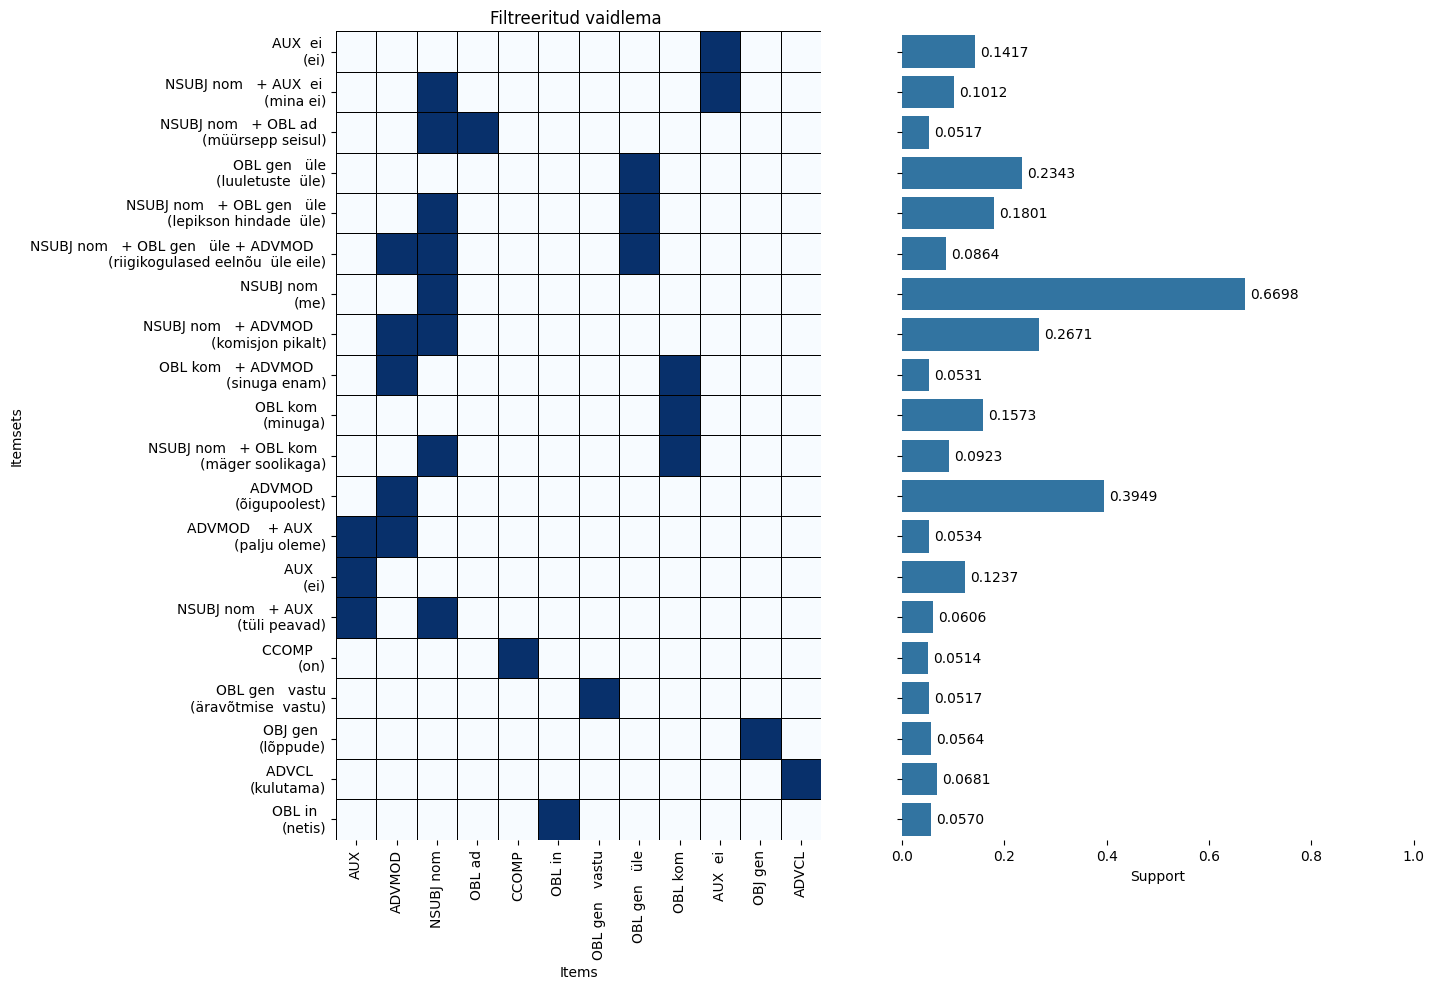

CPU times: user 6.01 s, sys: 3.45 s, total: 9.46 s
Wall time: 18.2 s


In [4]:
%%time
result = v33.make_all(verb='vaidlema', verb_compound='', examples=True)


## vaidlema filtreeritud transaktsioonidega

In [5]:
# kõik vaidlema transaktsioonid apriori algoritmile sobival kujul
all_transactions = v33.get_transactions(verb="vaidlema", verb_compound="")
# v33._raw_transactions sisemuutujas on salvestatud kõik need transaktsioonid kohendamata kujul
# küll on seal feature, et 'form' asemel on 'frequent_form'
display(all_transactions[list(all_transactions.keys())[0]])
# kui on vaja lisaandmeid, neid saab sama id järgi kätte siit
display(v33._raw_transactions[list(all_transactions.keys())[0]])

[{'deprel': 'ADVMOD', 'case': '', 'frequent_form': '', 'obl_case': ''},
 {'deprel': 'NSUBJ', 'case': 'nom', 'frequent_form': '', 'obl_case': ''},
 {'deprel': 'ADVMOD', 'case': '', 'frequent_form': '', 'obl_case': ''}]

[{'deprel': 'ADVMOD',
  'case': '',
  'feats': '',
  'frequent_form': 'loomulikult',
  'obl_case': '',
  'loc': 1},
 {'deprel': 'NSUBJ',
  'case': 'nom',
  'feats': 'nom,pl',
  'frequent_form': 'me',
  'obl_case': '',
  'loc': 2},
 {'deprel': 'ADVMOD',
  'case': '',
  'feats': '',
  'frequent_form': 'ikka',
  'obl_case': '',
  'loc': 3}]

In [6]:
# transaktsioonid, mida antakse apriori sisendiks
# neid võib olla kas vähem, või nad võivad olla muudetud sisuga

altered_transactions = {}

# eemaldane nt välja kõik NSUBJ ja kui muid ridu ei jää, siis ei saada seda transaktsiooni analüüsimisele

for head_id, tr_rows in all_transactions.items():
    all_deprels = list(set([r['deprel'] for r in tr_rows]))
    # kui ainus deprel ongi 'NSUBJ'
    if all_deprels == ['NSUBJ']:
        continue
    # võtame kõik deprelid peale 'NSUBJ'
    altered_transactions[head_id] = [r for r in tr_rows if r['deprel'] not in ['NSUBJ']]
    
display(altered_transactions[list(altered_transactions.keys())[0]])

[{'deprel': 'ADVMOD', 'case': '', 'frequent_form': '', 'obl_case': ''},
 {'deprel': 'ADVMOD', 'case': '', 'frequent_form': '', 'obl_case': ''}]

In [7]:
# filtreerimata apriori tulemus
df_apriori_unfiltered = v33.apriori(altered_transactions)
df_apriori_unfiltered

Ridu analüüsimiseks: 3298
apriori min_support: 0.05


,support,itemsets,itemlists,example1,example2,example3
1,0.430867,"((ADVMOD, , , ))","[(ADVMOD, , , )]",rängalt,kunagi,siin
9,0.255609,"((OBL, gen, , üle))","[(OBL, gen, , üle)]",pensionisüsteemi üle,mille üle,selle üle
11,0.171619,"((OBL, kom, , ))","[(OBL, kom, , )]",lolliga,marjuga,partneritega
3,0.154639,"((AUX, , ei, ))","[(AUX, , ei, )]",ei,ei,ei
2,0.134930,"((AUX, , , ))","[(AUX, , , )]",on,oled,oleme
13,0.116434,"((OBL, gen, , üle), (ADVMOD, , , ))","[(OBL, gen, , üle), (ADVMOD, , , )]",seisukohtade üle seal,selle üle tuliselt,selle üle jätkuvalt
7,0.077016,"((OBL, ad, , ))","[(OBL, ad, , )]",teemal,trepil,eesmärgil
0,0.074287,"((ADVCL, , , ))","[(ADVCL, , , )]",valmistati,rakendada,saab
10,0.062159,"((OBL, in, , ))","[(OBL, in, , )]",saates,salongides,kohtus
5,0.061552,"((OBJ, gen, , ))","[(OBJ, gen, , )]",küsimuse,giza,õiguse


In [8]:
# filtreerud apriori tulemus
df_apriori = v33.filter_apriori_results(df_apriori_unfiltered)
df_apriori

,support,itemsets,itemlists,example1,example2,example3,drop,drop_reason,length
1,0.430867,"((ADVMOD, , , ))","[(ADVMOD, , , )]",rängalt,kunagi,siin,False,,1
9,0.255609,"((OBL, gen, , üle))","[(OBL, gen, , üle)]",pensionisüsteemi üle,mille üle,selle üle,False,,1
11,0.171619,"((OBL, kom, , ))","[(OBL, kom, , )]",lolliga,marjuga,partneritega,False,,1
3,0.154639,"((AUX, , ei, ))","[(AUX, , ei, )]",ei,ei,ei,False,,1
2,0.134930,"((AUX, , , ))","[(AUX, , , )]",on,oled,oleme,False,,1
13,0.116434,"((OBL, gen, , üle), (ADVMOD, , , ))","[(OBL, gen, , üle), (ADVMOD, , , )]",seisukohtade üle seal,selle üle tuliselt,selle üle jätkuvalt,False,,2
7,0.077016,"((OBL, ad, , ))","[(OBL, ad, , )]",teemal,trepil,eesmärgil,False,,1
0,0.074287,"((ADVCL, , , ))","[(ADVCL, , , )]",valmistati,rakendada,saab,False,,1
10,0.062159,"((OBL, in, , ))","[(OBL, in, , )]",saates,salongides,kohtus,False,,1
5,0.061552,"((OBJ, gen, , ))","[(OBJ, gen, , )]",küsimuse,giza,õiguse,False,,1


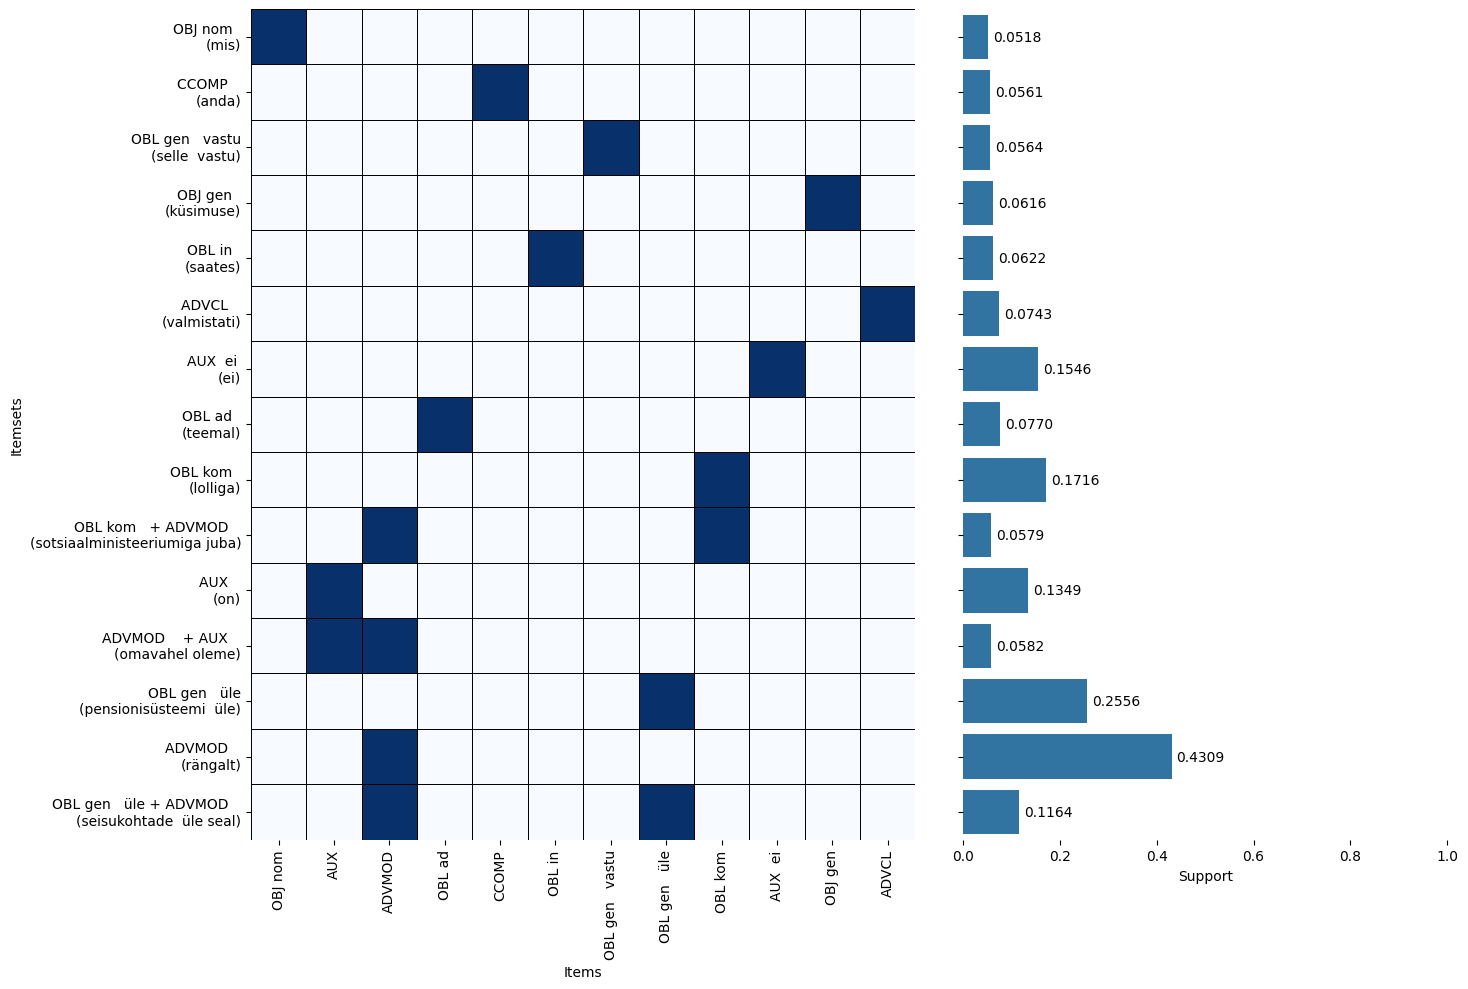

In [9]:
v33.draw_heatmap(df_apriori)